# Radiation and the Planck Function

The Planck function gives the radiative flux from a "black body" at temperature T.  One can get it per unit wavelength or per unit frequency, but it's often better to think in terms of "per unit log", and (or "because") then it doesn't matter if one uses one or the other.

Then the Planck function is -- in units of energy per unit area and time (see Wikipedia):

\begin{equation}\tag{1}
B(\lambda,T)\, d\lambda = \frac{2 h c^2}{\lambda^4} \frac{1}{e^{\frac{h c}{\lambda k_B T}}-1} \frac{d\lambda}{\lambda} \,,
\end{equation}

or, using the non-dimensional argument $x = \frac{h c}{\lambda k_B T}$

\begin{equation}\tag{2}
{
B(\lambda,T)\, d\lambda 
= \frac{2 k_B^4 T^4}{h^3 c^2} \frac{x^4}{e^{x}-1}\, \frac{dx}{x}  
%= \frac{2 k_B^4 T^4}{h^3 c^2} \frac{x^3}{e^{x}-1}\, dx  
\,,
}
\end{equation}

The integral over $x$ gives $\pi^4/15$, so the constant in front is (including another $\pi$ from flux integration):

\begin{equation}\tag{3}
{
\sigma_{Stefan} = \frac{2 \pi^5 k_B^4}{15 h^3 c^2} \,,
}
\end{equation}

where $\sigma_{Stefan}$ is called ___Stefans constant___.


The general shape of the Planck Function, in terms of contributions per log interval 
$d\ln \lambda = d\ln \nu = d\ln x = dx/x$, is:

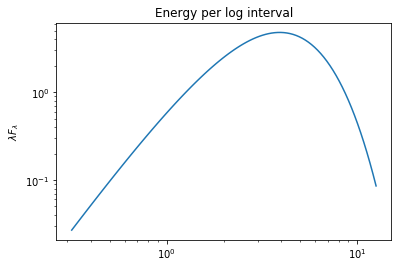

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.logspace(-0.5,1.1,100)
plt.loglog(x,x**4/(np.exp(x)-1)); plt.ylabel('$\lambda F_{\lambda}$'); plt.title('Energy per log interval');

The power law at low frequency is the so-called "Wien"-part of the spectrum.  At large $x$ there is a sharp drop.

## An optimized Planck function

The Planck function potentially takes a significant amount of time, so the definition of it in the `radiaiton.py` package, which is in the same directory as this notebook, has a `simple` method, and an optimized default method.  Let's measure the speed when computing $200^3$ values, repeatly, for one second:

### Testing CGS and code values

In [2]:
from radiation import Planck
from scaling import scaling, CGS

T = 1000.
lamb = 1e4*CGS.Angstrom
S_cgs = Planck(T,lamb,units=CGS,verbose=0)
print('At T = {:.3e} and lambda = {:.3e} (CGS), B(T,lambda) = {:.3e} (CGS)'.format(T,lamb,S_cgs))

code = scaling(l='pc',t='Myr',m='Solar',verbose=0)
#lamb /= code.l
S_code = Planck(T,lamb,units=code,verbose=0)
print('At T = {:.3e} and lambda = {:.3e} (code), B(T,lambda) = {:.3e} (code)'.format(T,lamb,S_code))

S_expect = S_cgs*code.l**2*(code.t/code.e)
ok = 'not ' if np.abs(S_code/S_expect-1.0) > 1e-4 else ''
print('The expected rescaled S value is {:.3e}, {}correct!'.format(S_expect,ok))

At T = 1.000e+03 and lambda = 1.000e-04 (CGS), B(T,lambda) = 4.367e+02 (CGS)
At T = 1.000e+03 and lambda = 1.000e-04 (code), B(T,lambda) = 2.307e+17 (code)
The expected rescaled S value is 6.901e+09, not correct!


### Measuring cost per point

In [3]:
from time import time
n = 200
T = np.ones((n,n,n))
lamb = 1.
def timeit(method='simple'):
    start = time()
    it = 0
    used = 0.0
    while used < 1:
        it += 1
        p = Planck(T,lamb,units=CGS,method=method)
        used = time()-start
    print('Evaluating the {} Planck function takes about '.format(method) +
         '{:.0f} nanosec/point ({} iterations)'.format(1e9*used/(it*n**3),it))

In [4]:
timeit('simple')
timeit('optimized')

Evaluating the simple Planck function takes about 167 nanosec/point (1 iterations)
Evaluating the optimized Planck function takes about 42 nanosec/point (3 iterations)


That quite significant difference comes from the simple optimization of basically writing `((T*x)**2)**2` instead of `T**4 x**4`; cf. `radiation.py`!